In [5]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random
import pickle
from IPython.display import clear_output
import time


class DataSet:
    
    def __init__(me,location,categories,resize=True,lheight=500,lwidth=500,grayscale=True,shuffled=True):
        me.categories=categories
        me.datadir=location
        me.lheight=lheight
        me.lwidth=lwidth
        me.grayscale=grayscale
        me.shuffled=shuffled
        me.dataset=me.create_traindata()
        if resize==True:
            me.dataset=me.resizeIt(me.dataset)
        
        
    
    def resizeIt(me,traindata_array):
        resized_traindata=[]
        for img,label in traindata_array:
            new_image_array=cv2.resize(img,(me.lheight,me.lwidth))
            resized_traindata.append([np.array(new_image_array),label])
        return(resized_traindata)

    
    def create_traindata(me):
        traindata=[]
        n=0
        for cats in me.categories:
            path=os.path.join(me.datadir,cats)
            class_num=me.categories.index(cats)
            for img in os.listdir(path):
                if(me.grayscale==True):
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                    clear_output()
                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                else:
                    img_array=cv2.imread(os.path.join(path,img))
                traindata.append([img_array,class_num])
        if (me.shuffled==False):
            return(traindata)
        else:
            random.shuffle(traindata)
            return(traindata)
    
    
    def save(me,traindata,location_names):
        feature_set=[]
        label_set=[]
        for features,labels in traindata:
            feature_set.append(features)
            label_set.append(labels)
            
        x=np.array(x).reshape(-1,me.lwidth,me.lheight,1)

        pickle_out=open(location_names[0]+'.pickle','wb')
        pickle.dump(feature_set,pickle_out)
        pickle_out.close()
        pickle_out=open(location_names[1]+'.pickle','wb')
        pickle.dump(label_set,pickle_out)
        pickle_out.close()


In [6]:
train_data=DataSet("C:\datasets\pd only substantia",["PD","CONTROL"],lheight=512,lwidth=512)
print(train_data.dataset)

616 images loaded successfully[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [

In [32]:
print(type(train_data.dataset[1][0]))

<class 'numpy.ndarray'>


In [30]:
print(train_data.dataset[1])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


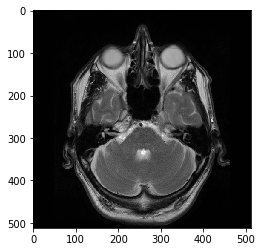

1


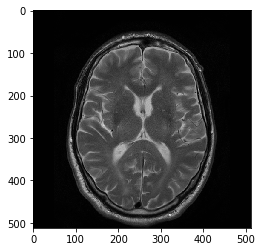

1


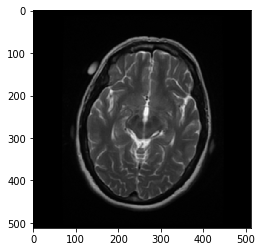

0


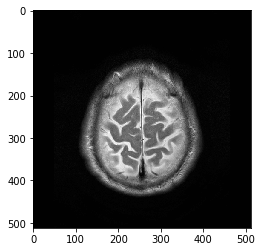

1


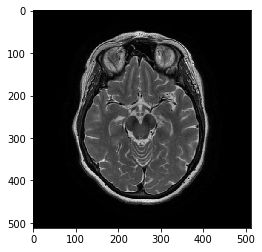

0


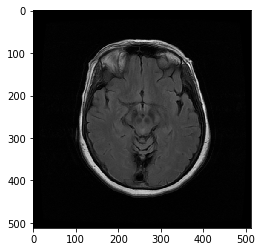

0


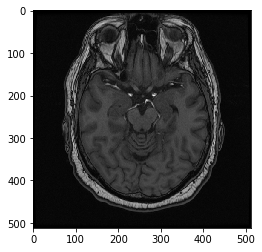

0


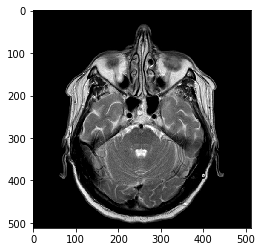

1


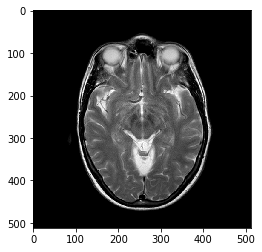

0


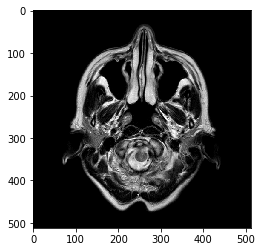

1


In [38]:
for i in range(100,110):
    plt.imshow(train_data.dataset[i][0],cmap='gray')
    plt.show()
    print(train_data.dataset[i][1])

In [ ]:
train_data=DataSet("C:\datasets\pd only substantia",["PD","CONTROL"],lheight=512,lwidth=512)